In [229]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

## There is a significant use of classification based algorithms to solve problems like Sentiment Analysis and Chatbot Creation.

## The example that we will cover today belongs from the domain of Natural Language Processing and it will use classification based algorithms to make sense out of the textual data.


# Restaurant Review Classification System

## The data preprocessing step is crucial part of the Data Science spectrum. Depending upon the type of data, the preprocessing steps vary.

### Continuous or Categorical --------> Data Preprocessing
### Images or Videos -----------------> Image Preprocessing
### Textual Data ---------------------> Natural Language Processing

## Data Preprocessing is a broad step which is subjective to the problem we are solving and the data we have.

In [230]:
data = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [231]:
data.shape

(1000, 2)


By inspecting the data, we understand that it is a typical 
binary classification problem wherein we have to predict sentiments
associated with a particular review.

* Positive Review: 1
* Negative Review: 0

The only problem is that the input data (feature matrix) is not
continuous or categorical in nature. It is actually textual.
In order to preprocess the data so that a machine learning
algorithm can make sense out of it, we need to apply certain
nlp techniques.

The general steps to preprocess textual data

1. Remove all the numbers, punctuations, emojis and unwanted 
    characters.
2. Getting all the data into a similar case (lower case).
3. Remove all the unwanted words like preprositions, conjunctions,
    determiners, pronouns and fillers etc.
4. Perform stemming or lemmatization.
5. Select an nlp model to represent the data (Bag or Words, TF-IDF Word Vector etc).

## Test Review to understand all the preprocessing steps ##
    
**"The food here was totally delicious!! *Smiling emoji*. 100% \
recommended"**

1. The food here was totally delicious recommended

2. the food here was totally delicious recommended

3. food totally delicious recommended

Stemming vs Lemmatization

Stemming trims down a word syntax wise to return the root word
Lemmatization trims down a word semantic wise to return the root word

Sample three review

"I love the food here."
"I'm loving it."
"I loved the food here."

In the dataset, for positive predictors we can consider 
{love, loving, loved} all three but a better approach to save space
and time complexity would be to consider the root word only.

{love, loving, loved} ----> lov / love (Depends on the library)

{Good, Better, Best} ---> Stemming does not makes sense here.
Lemmatization would derive the root word semantically (meaning wise)

{Good, Better, Best} ----> good

4. food total delici recommend

5. Once preprocessing is done, select the bag of words model to 
    convert textual data into a sparse matrix
    
Bag of Words in Action

food : 0
total : 1
delici : 2
recommend : 3

Note: We have only preprocessed one review and the bag of words model
    gives 4 unique integer labels. Now suppose we have 1 lac reviews,
    in this case the bag of words model might return few lac unique
    integers for unique words.
    
Some other review: "Food was extremely tasty"
After NLP: "food extreme tasty"

extreme: 4
tasty: 5

After all unique words have been assigned unique labels, we create a 
sparse matrix where the columns represent all the words and the rows
represent a particular review.

Columns are all the unique words

* **Columns -> 0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16**
* **Row 1 ->   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0**
* **Row 2 ->   1   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0**

Fill 1 if the review contains the word from the column else put 0

Now we will actually apply all the aforementioned steps. For which
we need a special library known as nltk (natural language toolkit)
We will also use re library that is regular expressions library

In [232]:
import re
import nltk

In [233]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Stopwords is a module in nltk that contains all the unwanted words like he, she, it, when, was, where, the, a, an etc

In [234]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [235]:
data['Review'][0]

'Wow... Loved this place.'

In regular expression: [^a-zA-Z] means catch everything which is not
in the range of small a to small z and Capital A to Capital Z.
^ (Carrot symbol) is used for negation.

In [236]:
temp = re.sub('[^a-zA-Z]',' ',data['Review'][0])
temp

'Wow    Loved this place '

In [237]:
temp = temp.lower()
temp

'wow    loved this place '

In [238]:
temp = temp.split()
temp

['wow', 'loved', 'this', 'place']

In [239]:
t1 = [word for word in temp if not word in set(stopwords.words('english'))]
t1

['wow', 'loved', 'place']

In [240]:
ps = PorterStemmer()

In [241]:
t2 = [ps.stem(word) for word in temp if not word in set(stopwords.words('english'))]
t2

['wow', 'love', 'place']

In [242]:
temp = [ps.stem(word) for word in temp if not word in set(stopwords.words('english'))]
temp

['wow', 'love', 'place']

In [243]:
temp = ' '.join(temp)
temp

'wow love place'

In [244]:
clean_reviews = []

In [245]:
clean_reviews = []
for i in range(data.shape[0]):
    temp = re.sub('[^a-zA-Z]',' ',data['Review'][i])
    temp = temp.lower()
    temp = temp.split()
    temp = [ps.stem(word) for word in temp if not word in set(stopwords.words('english'))]
    temp = ' '.join(temp)
    clean_reviews.append(temp)
clean_reviews[:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

### For the BOW Model we will use CountVectorizer class from sklearn

In [246]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [247]:
x = cv.fit_transform(clean_reviews)

In [248]:
x = x.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Q. If you want to know what are these 1565 words which have been made into a column as a sparse matrix then you can use this syntax

In [249]:
print(cv.get_feature_names()[:10])

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across']


### Note : Statistics is the study of general trends and not special exceptions. In some cases, the column number could become extensively large for us to work with. In that case we only use a selected fragment of columns and drop everything else by using an arguement.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100)

x = cv.fit_transform(clean_reviews)

x = x.toarray()
x

print(cv.get_feature_names())

### Note : If you decrease the No. of columns, then performance of your model would also decrease but speed and efficiency will increase. There is a tradeoff that we establish between No. of columns and Model Accuracy.

In [250]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [251]:
x = cv.fit_transform(clean_reviews)

In [252]:
x = x.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [253]:
print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 

In [254]:
y = data['Liked'].values

In [255]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=7)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(750, 1565) (250, 1565) (750,) (250,)


In [256]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [257]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [258]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [259]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [260]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [261]:
from sklearn.model_selection import cross_val_score

In [262]:
print("Logistic Regression :",cross_val_score(logreg,xtrain,ytrain,cv=5))
print("KNN :",cross_val_score(knn,xtrain,ytrain,cv=5))
print("Decision Tree :",cross_val_score(dtc,xtrain,ytrain,cv=5))
print("Gaussian NB :",cross_val_score(gnb,xtrain,ytrain,cv=5))
print("Random Forest :",cross_val_score(rf,xtrain,ytrain,cv=5))

Logistic Regression : [0.72       0.82       0.74       0.83333333 0.76      ]
KNN : [0.59333333 0.72       0.68666667 0.63333333 0.78      ]
Decision Tree : [0.67333333 0.75333333 0.70666667 0.78666667 0.72666667]
Gaussian NB : [0.68       0.74666667 0.67333333 0.72       0.66666667]
Random Forest : [0.74666667 0.82       0.76666667 0.81333333 0.75333333]


In [263]:
from sklearn.model_selection import cross_val_predict

In [264]:
print("Logistic Regression :",cross_val_predict(logreg,xtest,ytest,cv=5))
print("KNN :",cross_val_predict(knn,xtest,ytest,cv=5))
print("Decision Tree :",cross_val_predict(dtc,xtest,ytest,cv=5))
print("Gaussian NB :",cross_val_predict(gnb,xtest,ytest,cv=5))
print("Random Forest :",cross_val_predict(rf,xtest,ytest,cv=5))

Logistic Regression : [0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0]
KNN : [0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 1 1

In [265]:
ypred_log = cross_val_predict(logreg,xtest,ytest,cv=5)
ypred_knn = cross_val_predict(knn,xtest,ytest,cv=5)
ypred_dtc = cross_val_predict(dtc,xtest,ytest,cv=5)
ypred_gnb = cross_val_predict(gnb,xtest,ytest,cv=5)
ypred_rf = cross_val_predict(rf,xtest,ytest,cv=5)

In [266]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score

In [267]:
print("Logistic Regression :",accuracy_score(ytest,ypred_log))
print("KNN :",accuracy_score(ytest,ypred_knn))
print("Decision Tree :",accuracy_score(ytest,ypred_dtc))
print("Gaussian NB :",accuracy_score(ytest,ypred_gnb))
print("Random Forest :",accuracy_score(ytest,ypred_rf))

Logistic Regression : 0.668
KNN : 0.504
Decision Tree : 0.588
Gaussian NB : 0.624
Random Forest : 0.6


In [268]:
print("Logistic Regression :",confusion_matrix(ytest,ypred_log))
print("KNN :",confusion_matrix(ytest,ypred_knn))
print("Decision Tree :",confusion_matrix(ytest,ypred_dtc))
print("Gaussian NB :",confusion_matrix(ytest,ypred_gnb))
print("Random Forest :",confusion_matrix(ytest,ypred_rf))

Logistic Regression : [[99 35]
 [48 68]]
KNN : [[92 42]
 [82 34]]
Decision Tree : [[100  34]
 [ 69  47]]
Gaussian NB : [[67 67]
 [27 89]]
Random Forest : [[109  25]
 [ 75  41]]


In [269]:
from sklearn.metrics import auc

In [270]:
ypred_log = cross_val_predict(logreg,xtest,ytest,cv=5,method='decision_function')
ypred_knn = cross_val_predict(knn,xtest,ytest,cv=5,method='predict_proba')
ypred_knn = ypred_knn[:,1]
ypred_dtc = cross_val_predict(dtc,xtest,ytest,cv=5,method='predict_proba')
ypred_dtc = ypred_dtc[:,1]
ypred_gnb = cross_val_predict(gnb,xtest,ytest,cv=5,method='predict_proba')
ypred_gnb = ypred_gnb[:,1] 
ypred_rf = cross_val_predict(rf,xtest,ytest,cv=5,method='predict_proba')
ypred_rf = ypred_rf[:,1]

Logistic Regression : 0.6936116829644879


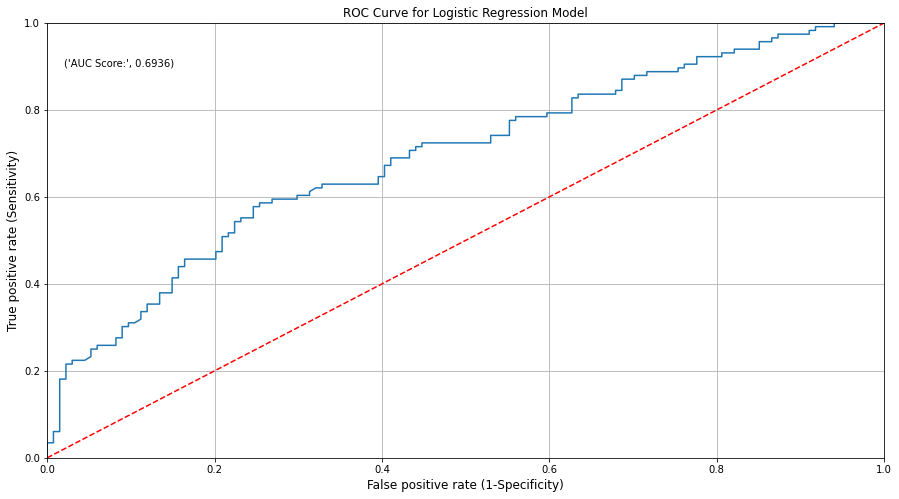

In [271]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest,ypred_log)
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

plt.title('ROC Curve for Logistic Regression Model')
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest, ypred_log),4)))

plt.grid(True)
print("Logistic Regression :",auc(fpr,tpr))

KNN : 0.539468605249614


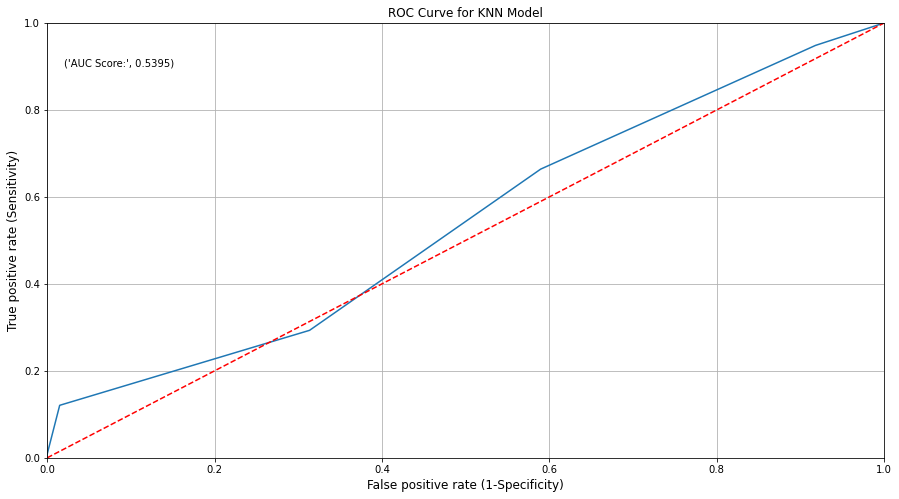

In [272]:
fpr, tpr, thresholds = roc_curve(ytest,ypred_knn)
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

plt.title('ROC Curve for KNN Model')
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest, ypred_knn),4)))

plt.grid(True)
print("KNN :",auc(fpr,tpr))

Decision Tree : 0.5404014410705096


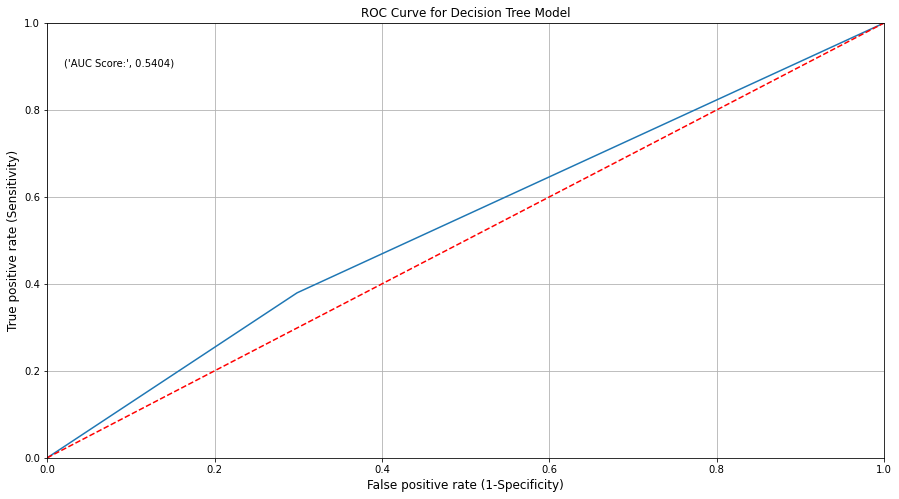

In [273]:
fpr, tpr, thresholds = roc_curve(ytest,ypred_dtc)
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

plt.title('ROC Curve for Decision Tree Model')
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest, ypred_dtc),4)))

plt.grid(True)
print("Decision Tree :",auc(fpr,tpr))

Naive Bayes: 0.6336206896551724


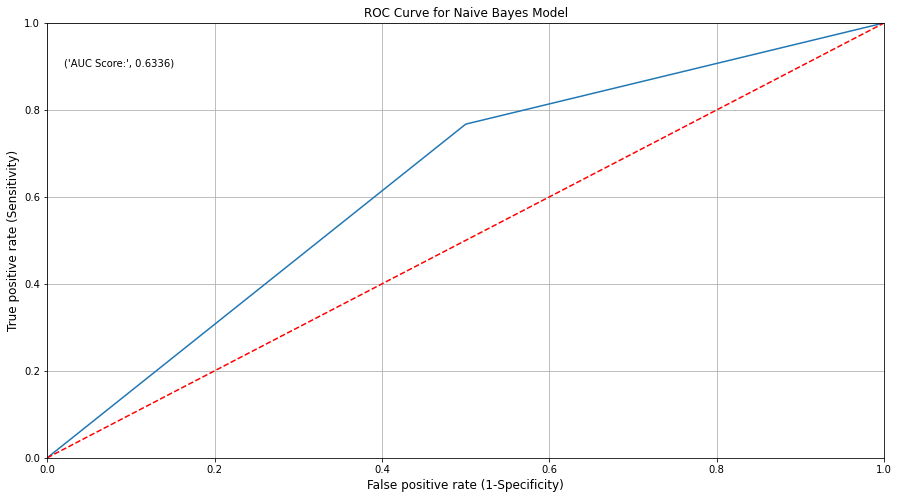

In [274]:
fpr, tpr, thresholds = roc_curve(ytest,ypred_gnb)
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

plt.title('ROC Curve for Naive Bayes Model')
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest, ypred_gnb),4)))

plt.grid(True)
print("Naive Bayes:",auc(fpr,tpr))

Random Forest : 0.6351003602676274


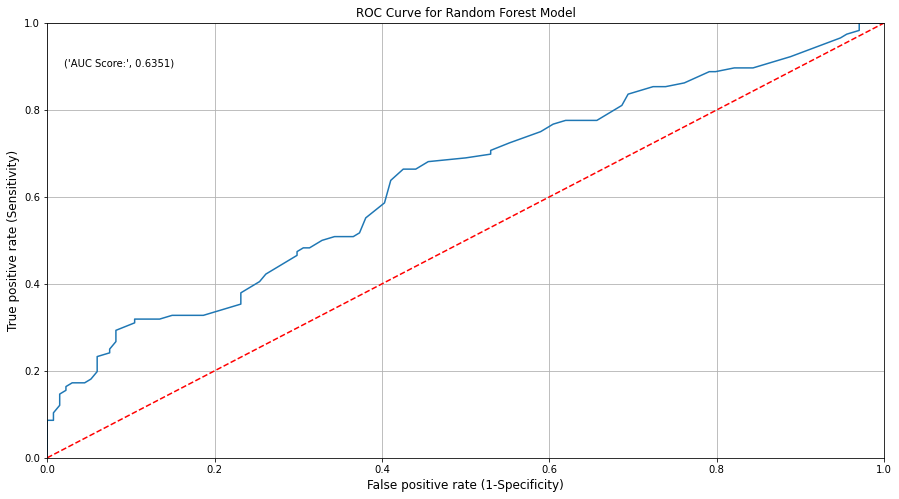

In [275]:
fpr, tpr, thresholds = roc_curve(ytest,ypred_rf)
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

plt.title('ROC Curve for Random Forest Model')
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest, ypred_rf),4)))

plt.grid(True)
print("Random Forest :",auc(fpr,tpr))

Note: If you wanted to create a classification project then
apart from the aforementioned code, plot a couple of graphs,
get auc score and you are done. BUT (IN CAPITAL LETTERS)

Project != Product

Product has to be deployed somewhere. Popular deployment
mediums are:
   1. Cloud (AWS, AZURE, WATSON)
   2. Browser (Javascript, Django, Flask)
   3. Mobile Device (Android, IOS)
   4. IOT or Arduino
    
Basically, we want to create a system where user inputs a 
feedback or review and the system outputs a positive or
negative symbol.

In [297]:
def run():
    print('Please give us your Feedback!')
    str1 = input()
    str1 = [str1]
    x_str = cv.transform(str1)
    x_str = x_str.toarray()
    y_str = logreg.predict(x_str)
    y_str = y_str[0]
    if y_str == 1:
        print('Logistic Regression says --> Yay! Positive Review')
    else:
        print('Logistic Regression says --> Negative Review! Our Apologies')
    
    y_str_knn = knn.predict(x_str)
    y_str_knn = y_str_knn[0]
    
    if y_str_knn == 1:
        print("KNN says --> Yayy! Positive Review")
    else:
        print("KNN says --> Negative Review! Our Apologies!")
    
    y_str_dtc = dtc.predict(x_str)
    y_str_dtc = y_str_dtc[0]
    
    if y_str_dtc == 1:
        print("Decision Tree says --> Yayy! Positive Review")
    else:
        print("Decision Tree says --> Negative Review! Our Apologies!")
    
    y_str_gnb = gnb.predict(x_str)
    y_str_gnb = y_str_gnb[0]
    
    if y_str_gnb == 1:
        print("Guassian NB says --> Yayy! Positive Review")
    else:
        print("Guassian NB says --> Negative Review! Our Apologies!")
    
    y_str_rf = rf.predict(x_str)
    y_str_rf = y_str_rf[0]
    
    if y_str_rf == 1:
        print("Random Forest says --> Yayy! Positive Review")
    else:
        print("Random Forest says --> Negative Review! Our Apologies!")
    
    total_y = (y_str + y_str_knn + y_str_dtc + y_str_gnb + y_str_rf)/5
    total_y = np.abs(total_y)
    print(total_y)

In [298]:
run()

Please give us your Feedback!
Good Food
Logistic Regression says --> Yay! Positive Review
KNN says --> Yayy! Positive Review
Decision Tree says --> Yayy! Positive Review
Guassian NB says --> Yayy! Positive Review
Random Forest says --> Yayy! Positive Review
1.0
